# Lab 3: Geometric Transformations

Color to Grayscale conversion and geometric transformations:
- Translation
- Rotation
- Scaling
- Shearing
- Combined Affine Transformations

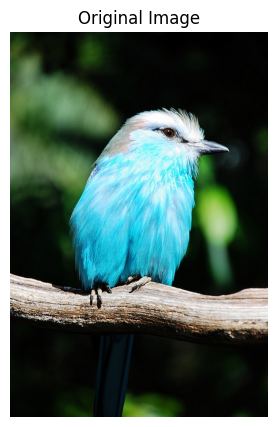

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("bird.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

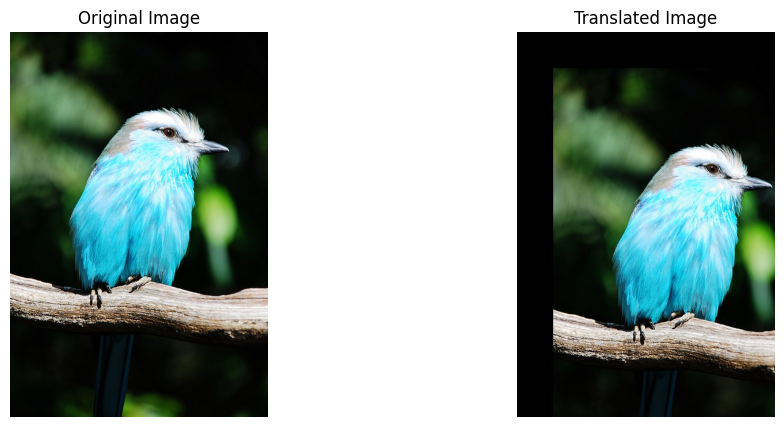

In [ ]:
tx = 60  
ty = 60 

height, width = img.shape[:2]

result = np.zeros_like(img)

for y in range(height):
    for x in range(width):
        new_x = x + tx
        new_y = y + ty

        if new_x < width and new_y < height:
            result[new_y, new_x] = img[y, x]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Translated Image")
plt.axis('off')
plt.show()

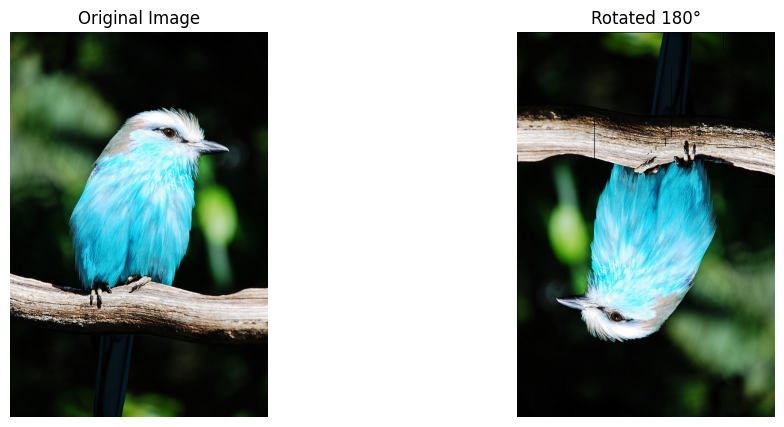

In [3]:
angle = 180  

height, width = img.shape[:2]
center_x = width // 2
center_y = height // 2

angle_rad = np.radians(angle)
cos_theta = np.cos(angle_rad)
sin_theta = np.sin(angle_rad)

result = np.zeros_like(img)

for y in range(height):
    for x in range(width):
        # Step 1
        new_x = x - center_x
        new_y = y - center_y
        
        # Step 2
        u = new_x * cos_theta - new_y * sin_theta
        v = new_x * sin_theta + new_y * cos_theta
        
        # Step 3
        u = int(u + center_x)
        v = int(v + center_y)
        
        if 0 <= u < width and 0 <= v < height:
            result[v, u] = img[y, x]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Rotated {angle}°")
plt.axis('off')
plt.show()

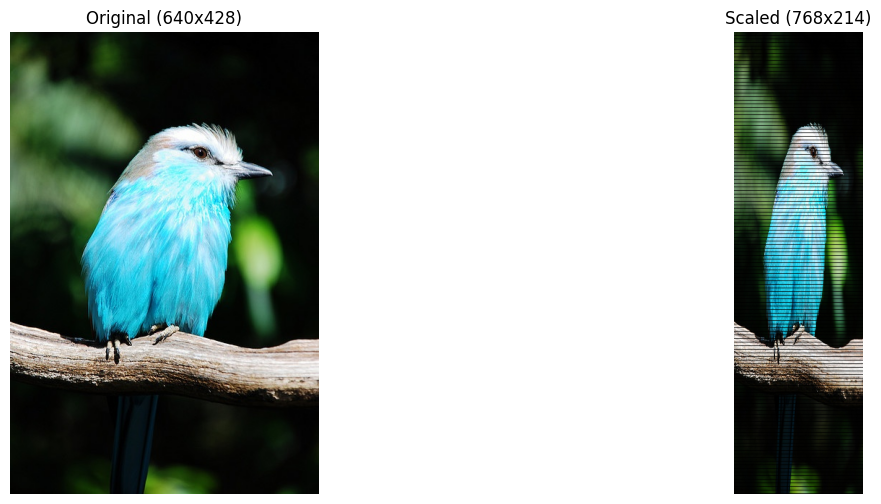

In [4]:
scale_x = 0.5  
scale_y = 1.2 

height, width = img.shape[:2]

new_width = int(width * scale_x)
new_height = int(height * scale_y)

result = np.zeros((new_height, new_width, 3), dtype=img.dtype)

for y in range(height):
    for x in range(width):
        new_x = int(x * scale_x)
        new_y = int(y * scale_y)
        
        if new_x < new_width and new_y < new_height:
            result[new_y, new_x] = img[y, x]

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"Original ({height}x{width})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Scaled ({new_height}x{new_width})")
plt.axis('off')
plt.show()

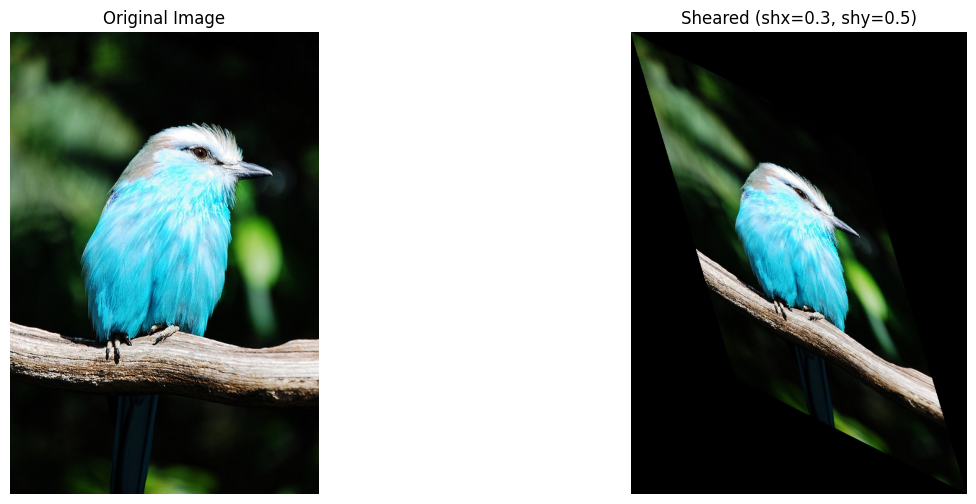

In [5]:
shear_x = 0.3
shear_y = 0.5

height, width = img.shape[:2]

new_width = width + int(abs(shear_x * height))
new_height = height + int(abs(shear_y * width))

result = np.zeros((new_height, new_width, 3), dtype=img.dtype)

for y in range(height):
    for x in range(width):
        new_x = int(x + shear_x * y)
        new_y = int(y + shear_y * x)
        
        if new_x < new_width and new_y < new_height:
            result[new_y, new_x] = img[y, x]

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Sheared (shx={shear_x}, shy={shear_y})")
plt.axis('off')
plt.show()

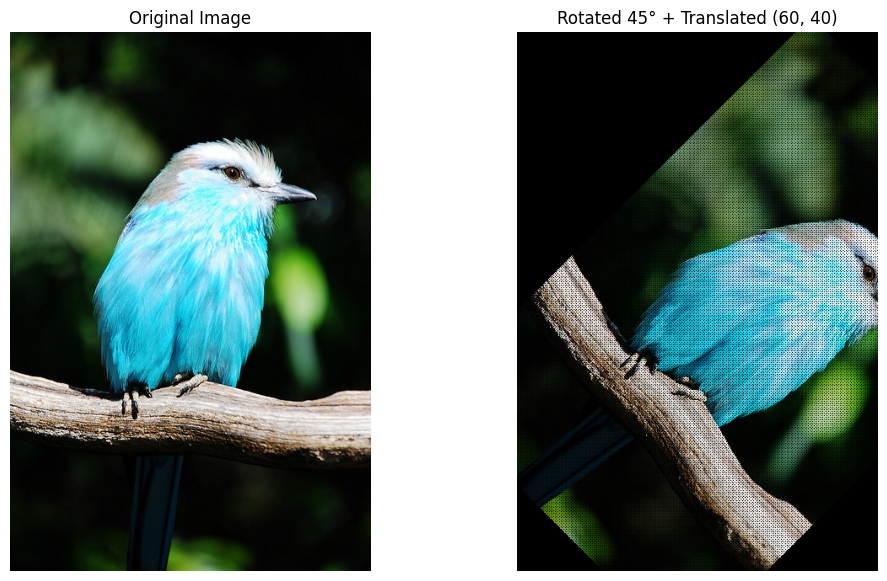

In [7]:
angle = 45   
tx = 60  
ty = 40  

height, width = img.shape[:2]
center_x = width // 2
center_y = height // 2

angle_rad = np.radians(angle)
cos_theta = np.cos(angle_rad)
sin_theta = np.sin(angle_rad)

result = np.zeros_like(img)

for y in range(height):
    for x in range(width):
        # Step 1
        new_x = x - center_x
        new_y = y - center_y
        
        # Step 2
        rotated_x = new_x * cos_theta - new_y * sin_theta
        rotated_y = new_x * sin_theta + new_y * cos_theta
        
        # Step 3
        x_after_rotation = rotated_x + center_x
        y_after_rotation = rotated_y + center_y
        
        # Step 4
        final_x = int(x_after_rotation + tx)
        final_y = int(y_after_rotation + ty)
        
        if 0 <= final_x < width and 0 <= final_y < height:
            result[final_y, final_x] = img[y, x]

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Rotated {angle}° + Translated ({tx}, {ty})")
plt.axis('off')
plt.show()

## How Manual Image Transformations Work

**Simple Explanation:**

Each transformation moves pixels from their original position to a new position using basic math formulas.

### 1. Translation (Moving the image)
- **Formula**: new_x = old_x + move_right, new_y = old_y + move_down
- **What it does**: Shifts the entire image to a new location

### 2. Rotation (Spinning the image)
- **Formulas**: 
  - new_x = old_x × cos(angle) - old_y × sin(angle)
  - new_y = old_x × sin(angle) + old_y × cos(angle)
- **What it does**: Spins the image around its center point

### 3. Scaling (Resizing the image)
- **Formula**: new_x = old_x × scale_factor_x, new_y = old_y × scale_factor_y
- **What it does**: Makes the image bigger or smaller

### 4. Shearing (Slanting the image)
- **Formulas**: 
  - new_x = old_x + (shear_factor × old_y)
  - new_y = old_y + (shear_factor × old_x)
- **What it does**: Makes the image look slanted or skewed

### 5. Combined Transformations
- **What it does**: Apply multiple transformations one after another
- **Example**: First rotate the image, then move it to a new position

**The Process:**
1. Go through every pixel in the original image
2. Calculate where that pixel should go using the transformation formula
3. Copy the pixel color to the new location
4. The result is the transformed image!